<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [ ]:
!nvidia-smi

Thu Jun 12 10:26:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.18.0


In [3]:
!git clone --depth 1 -b v2.18.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2680, done.
remote: Counting objects: 100% (2680/2680), done.
remote: Compressing objects: 100% (1925/1925), done.
remote: Total 2680 (delta 813), reused 1363 (delta 699), pack-reused 0 (from 0)
Receiving objects: 100% (2680/2680), 21.81 MiB | 33.38 MiB/s, done.
Resolving deltas: 100% (813/813), done.
Note: switching to '8c2f036b26c70ffa102b00d370e8c62fbcf14ba0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
!pip install pandas==2.2.2


In [2]:
import pandas as pd
print(pd.__version__)


2.2.2


In [4]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 128.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 99.9 MB/s eta 0:00:00
   

## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

In [8]:
!pip install --upgrade tensorflow-hub tf_keras
import os
# os.environ['TF_USE_LEGACY_KERAS'] = '1'  # Force Keras 2.x behavior


In [13]:
!pip uninstall tensorflow tf_keras tensorflow-hub -y
!pip install tensorflow tensorflow-hub


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: tf_keras 2.19.0
Uninstalling tf_keras-2.19.0:
  Successfully uninstalled tf_keras-2.19.0
Found existing installation: tensorflow-hub 0.16.1
Uninstalling tensorflow-hub-0.16.1:
  Successfully uninstalled tensorflow-hub-0.16.1
  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)
Using cached tf_keras-2.19.0-py3-none-any.whl (1.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
ten

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [1]:
import numpy as np
import tensorflow as tf
# import tf_keras as keras
# from tensorflow import keras  # Use Keras 3.x with TF ≥2.16[2][5]

import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.tools import tokenization
from official.nlp import optimization

In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.19.0
Eager mode:  True
Hub version:  0.16.1
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',compression='zip',low_memory=False)

In [4]:
df.shape

(1306122, 3)

In [5]:
df.tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


<Axes: title={'center': 'Target distribution'}, ylabel='Frequency'>

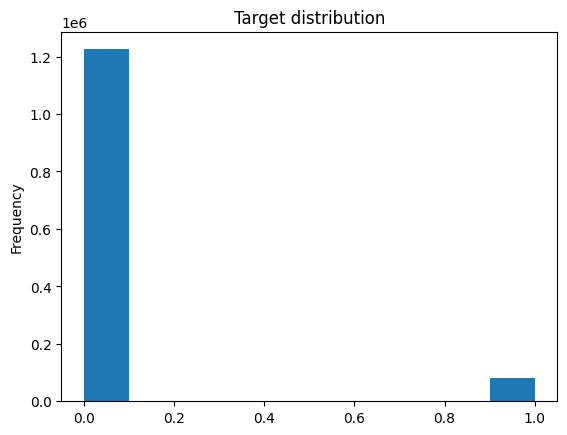

In [ ]:
df.target.plot(kind='hist',title='Target distribution')

Class counts:
target
0    1225312
1      80810
Name: count, dtype: int64


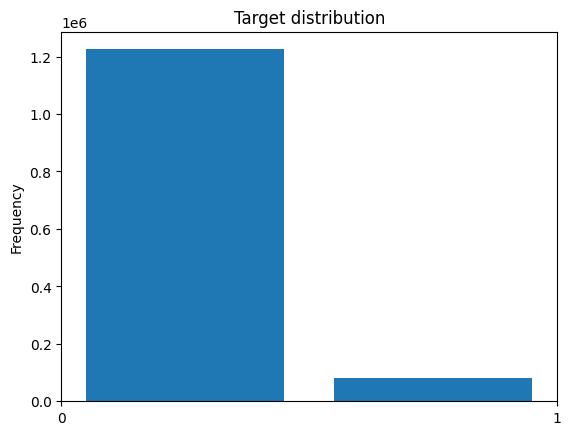

In [38]:
# Print the number of samples in each class
class_counts = df['target'].value_counts().sort_index()
print(f"Class counts:\n{class_counts}")

# Plot the histogram
ax = df['target'].plot(kind='hist', title='Target distribution', bins=2, rwidth=0.8)
ax.set_xticks([0, 1])
plt.show()


## Task 4: Create tf.data.Datasets for Training and Evaluation

In [6]:
from sklearn.model_selection import train_test_split
train_df, remaining = train_test_split(df,random_state=42, train_size=0.0075, stratify=df.target.values)
valid_df,_= train_test_split( remaining, random_state=42, train_size=0.00075, stratify=remaining.target.values)
train_df.shape, valid_df .shape

((9795, 3), (972, 3))

In [7]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values,train_df['target'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.question_text.values,valid_df.target.values))
  for text, label in train_data.take(1):
    print(text)
    print(label)


tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [8]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list=[0,1]# Label categories
max_seq_length=128 # maximum length of (token) input sequences
train_batch_size=32



# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",trainable=True)
vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()
tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case)


In [9]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are doing?')

['hi', '##,', 'how', 'are', 'doing', '##?']

In [10]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are doing?'))

[7632, 29623, 2129, 2024, 2725, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [11]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example=classifier_data_lib.InputExample(guid=None, text_a=text.numpy(), text_b=None, label=label.numpy())
  feature=classifier_data_lib.convert_single_example(0,example,label_list,max_seq_length,tokenizer)
  return (feature.input_ids,feature.input_mask,feature.segment_ids,feature.label_id)



You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [12]:
def to_feature_map(text, label):
  input_ids,input_mask,segment_ids,label_id=tf.py_function(to_feature,[text,label],[tf.int32,tf.int32,tf.int32,tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])
  x={
      'input_word_ids':input_ids,
      'input_mask':input_mask,
      'input_type_ids':segment_ids
  }
  return (x,label_id)



## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [13]:
with tf.device('/cpu:0'):
  # train
  train_data=(train_data.map(to_feature_map,num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .shuffle(1000)
    .batch(32,drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE)
  )




  # valid
  valid_data=(valid_data.map(to_feature_map,num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(32,drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))



The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [14]:
# train data spec
train_data.element_spec


({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [15]:
# valid data spec
valid_data.element_spec


({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [20]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras  # Use tf_keras instead of tf.keras

def create_model():
    # Input layers (use tf_keras)
    input_word_ids = keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_word_ids')
    input_mask = keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_mask')
    input_type_ids = keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_type_ids')


    # Pass inputs as a dictionary
    bert_outputs = bert_layer({
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    })

    pooled_output = bert_outputs['pooled_output']
    drop = keras.layers.Dropout(0.4)(pooled_output)
    output = keras.layers.Dense(1, activation='sigmoid', name='output')(drop)

    # Model definition with tf_keras
    model = keras.Model(
        inputs=[input_word_ids, input_mask, input_type_ids],
        outputs=output
    )
    return model


## Task 10: Fine-Tune BERT for Text Classification

In [22]:
model = create_model()

# Critical: Use tf_keras components for ALL compile arguments
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=2e-5),  # Not tf.keras!
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_mask (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 input_word_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                            

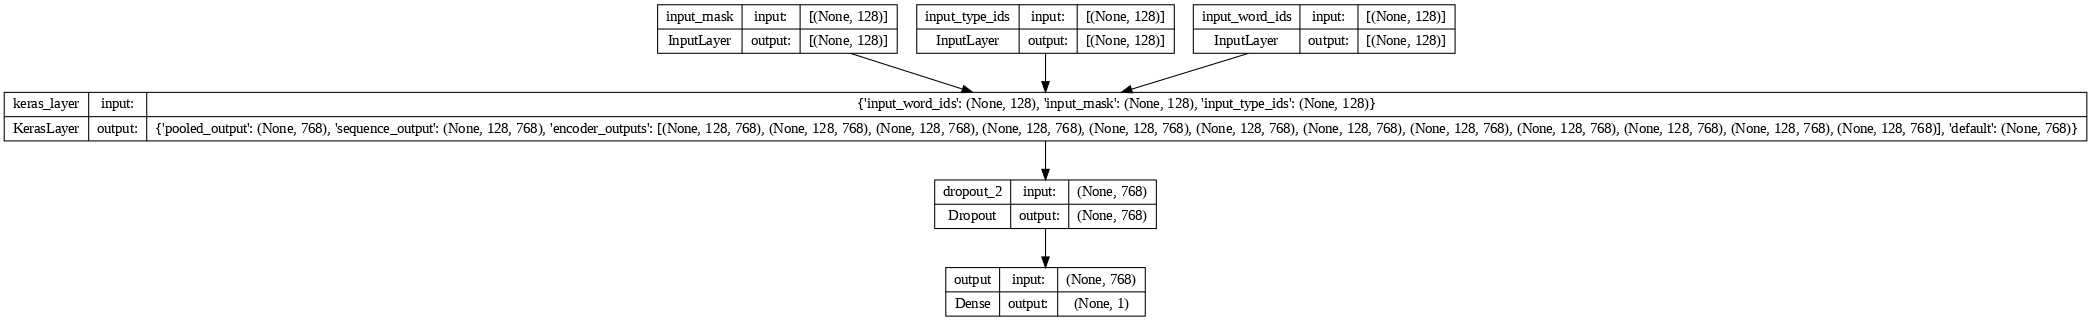

In [24]:
keras.utils.plot_model(model=model,show_shapes=True,dpi=76)

In [25]:
# Train model
epochs=4
hisory=model.fit(train_data,validation_data=valid_data,epochs=epochs,verbose=1)

Epoch 1/4
306/306 [==============================] - 297s 791ms/step - loss: 0.1650 - binary_accuracy: 0.9419 - val_loss: 0.1313 - val_binary_accuracy: 0.9406
Epoch 2/4
306/306 [==============================] - 245s 798ms/step - loss: 0.0978 - binary_accuracy: 0.9612 - val_loss: 0.1399 - val_binary_accuracy: 0.9542
Epoch 3/4
306/306 [==============================] - 250s 814ms/step - loss: 0.0504 - binary_accuracy: 0.9813 - val_loss: 0.1498 - val_binary_accuracy: 0.9594
Epoch 4/4
306/306 [==============================] - 249s 811ms/step - loss: 0.0200 - binary_accuracy: 0.9936 - val_loss: 0.2047 - val_binary_accuracy: 0.9583


## Task 11: Evaluate the BERT Text Classification Model

In [26]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

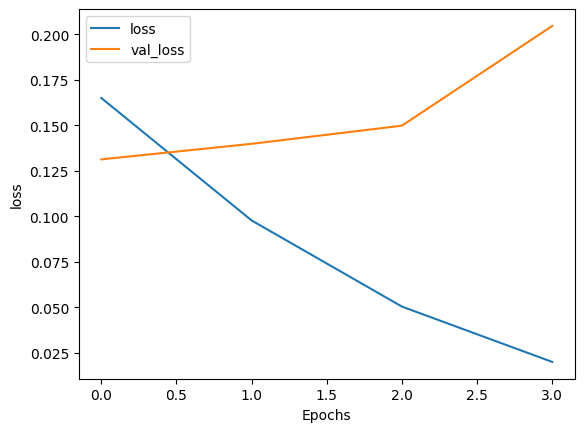

In [28]:
plot_graphs(hisory,'loss')

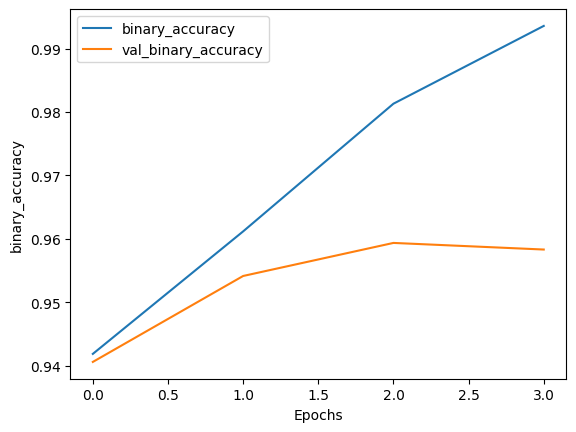

In [29]:
plot_graphs(hisory,'binary_accuracy')

In [37]:
sample_example =["You are a ugly bitch"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example,[0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
threshold = 0.5 #between O and 1
['Toxic' if pred >=threshold else 'Non-Toxic' for pred in preds]

1/1 [==============================] - 0s 42ms/step


['Toxic']

In [40]:
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [43]:
# Calculate class weights based on your data distribution
class_0_count = 1225312
class_1_count = 80810
weight_for_1 = class_0_count / class_1_count  # ~15.16

class_weights = {0: 1.0, 1: weight_for_1}  # {0: 1.0, 1: 15.16287588169781}

# Create and compile model with unique variable names
balanced_model = create_model()
from tensorflow.keras.metrics import F1Score

balanced_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=2e-5),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        F1Score(threshold=0.5)
    ]
)

# Train with class weights using renamed history variable
balanced_history = balanced_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=4,
    verbose=1,
    class_weight=class_weights  # Critical imbalance handling
)


Epoch 1/4
306/306 [==============================] - 304s 814ms/step - loss: 0.1082 - binary_accuracy: 0.9839 - f1_score: 0.8678 - val_loss: 0.2186 - val_binary_accuracy: 0.9469 - val_f1_score: 0.8695
Epoch 2/4
306/306 [==============================] - 248s 809ms/step - loss: 0.0249 - binary_accuracy: 0.9955 - f1_score: 0.8850 - val_loss: 0.2464 - val_binary_accuracy: 0.9552 - val_f1_score: 0.9016
Epoch 3/4
306/306 [==============================] - 250s 814ms/step - loss: 0.0470 - binary_accuracy: 0.9924 - f1_score: 0.9039 - val_loss: 0.2130 - val_binary_accuracy: 0.9552 - val_f1_score: 0.9060
Epoch 4/4
306/306 [==============================] - 250s 816ms/step - loss: 0.0479 - binary_accuracy: 0.9900 - f1_score: 0.9049 - val_loss: 0.1950 - val_binary_accuracy: 0.9552 - val_f1_score: 0.9043


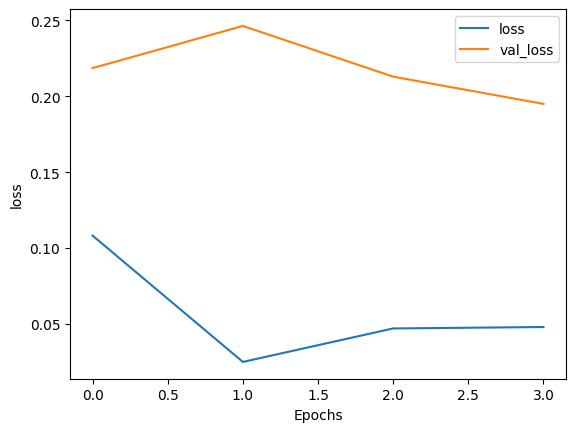

KeyError: 'acc'

In [44]:
# Plot Training & Validation Loss
plot_graphs(balanced_history, 'loss')

# Plot Training & Validation Accuracy
plot_graphs(balanced_history, 'binary_accuracy')

# Plot Training & Validation F1 Score
plot_graphs(balanced_history, 'f1_score')
